In [16]:
import numpy as np
#1
filename = '../data/befkbhalderstatkode.csv'
#2
data = np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)

neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
       5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
       10: 'Amager Vest', 99: 'Udenfor'}
#3
def get_pop_per_neighb(n):
    # creates mask for neighbourhood. uses mask.
    people_in_neighb = data[(data[:,1] == n) & year_mask]
    # gets pop. sums.
    return people_in_neighb[:,4].sum()

pop_per_neighb = np.array([get_pop_per_neighb(n) for n in neighb.keys()])
#print(pop_per_neighb)

neighb_keys = list(neighb.keys())
for i, p in enumerate(pop_per_neighb):
    print(neighb[neighb_keys[i]], p)





Indre By 51937
Østerbro 75113
Nørrebro 78802
Vesterbro/Kgs. Enghave 61623
Valby 51727
Vanløse 39537
Brønshøj-Husum 43908
Bispebjerg 53604
Amager Øst 55205
Amager Vest 64967
Udenfor 3872


In [17]:
%matplotlib notebook


<IPython.core.display.Javascript object>


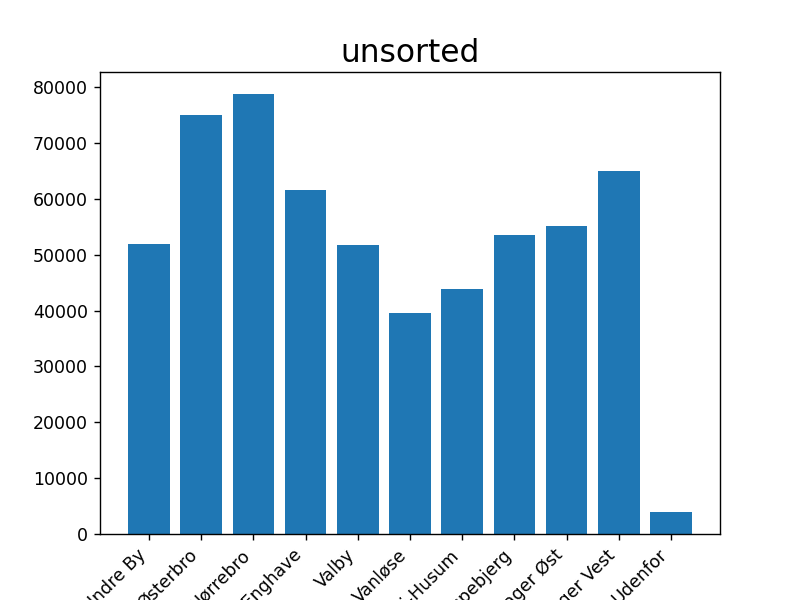

<IPython.core.display.Javascript object>


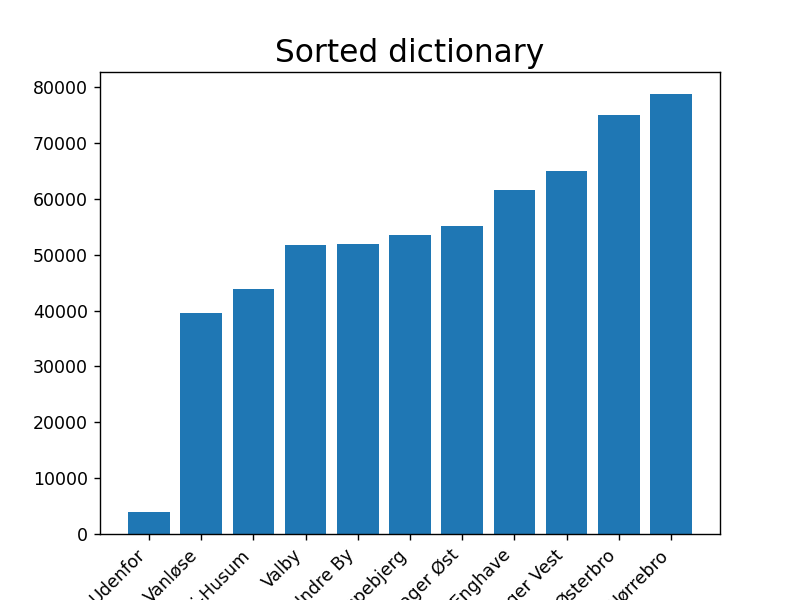

<IPython.core.display.Javascript object>


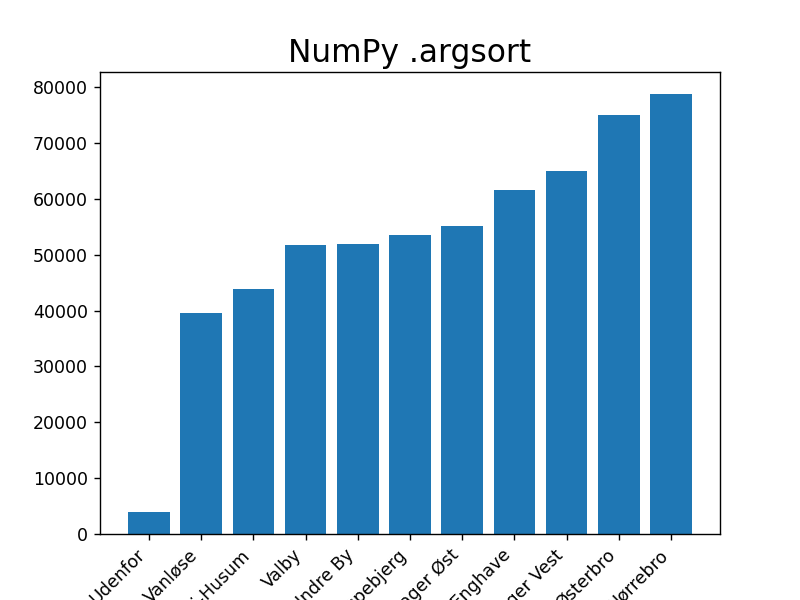

<BarContainer object of 11 artists>

In [37]:
import matplotlib.pyplot as plt

#4

plt.title("unsorted", fontsize=18)
plt.xticks(rotation=45, horizontalalignment="right")

plt.bar(neighb.values(), pop_per_neighb) # not sorted

new_dict = {n:pop_per_neighb[i] for i, n in enumerate(neighb.values())}
data_sorted = dict(sorted(new_dict.items(), key=lambda e: e[1]))

np_array = np.array([[n, get_pop_per_neighb(n)] for n in neighb.keys()])
np_data_sorted = np_array[np_array[:,1].argsort()]
names_sorted_by_value = [neighb[k] for k in np_data_sorted[:,0]]

plt.figure()
plt.title("Sorted dictionary", fontsize=18)
plt.xticks(rotation=45, horizontalalignment="right")
plt.bar(data_sorted.keys(), data_sorted.values())

plt.figure()
plt.title("NumPy .argsort", fontsize=18)
plt.xticks(rotation=45, horizontalalignment="right")
plt.bar(names_sorted_by_value, np_data_sorted[:,1])





In [42]:
#5
import numpy as np

file_path = '../data/befkbhalderstatkode.csv'
data = np.genfromtxt(file_path, delimiter=",", dtype=np.uint, skip_header=1)

year_mask = data[:,0] == 2015
above65_mask = data[:,2] > 65
sum_of_above65 = data[year_mask & above65_mask][:,4].sum()
print(sum_of_above65)

#6
nordic_codes = [5101,5104,5106,5110,5120]
mask_nordic = np.isin(data[:,3], nordic_codes) # can also use [c in nordic_codes for c in data[:,3]]
old_nords = data[year_mask & above65_mask & mask_nordic][:,4].sum()
print(old_nords)

55750
608


<IPython.core.display.Javascript object>


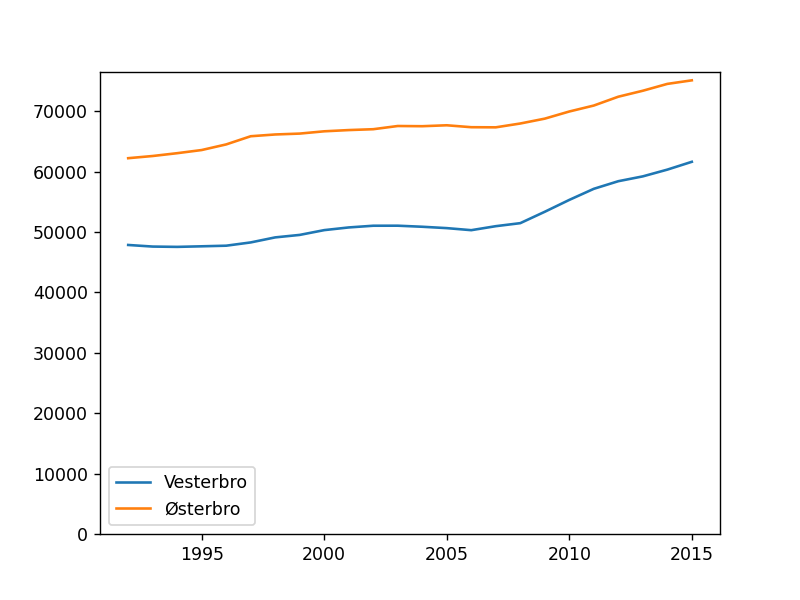

In [44]:
#7
import matplotlib.pyplot as plt

neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
       5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
       10: 'Amager Vest', 99: 'Udenfor'}

vesterbro = data[data[:,1] == 4]
østerbro = data[data[:,1] == 2]




def pop_per_year(arr, year):
    return arr[arr[:,0] == year][:,4].sum()


years = np.unique(data[:,0])


vesterbro_per_year = [pop_per_year(vesterbro, year) for year in years]
østerbro_per_year = [pop_per_year(østerbro, year) for year in years]


# Plotting
plt.figure()
plt.plot(years, vesterbro_per_year, label="Vesterbro")
plt.plot(years, østerbro_per_year, label="Østerbro")
plt.axis(ymin=0)
plt.legend()